<center><img src="https://www.cardrates.com/wp-content/uploads/2020/08/shutterstock_576998230.jpg"></center><br><br>

# <center>Identificando Fraudes de Cartão de Crédito com Machine Learning</center>

# Introdução<br>
Com o avanço do acesso a Internet e a popularização dos *smartphones*, cada vez mais as pessoas utilizam seus cartões de crédito para realizar compras em lojas online, aplicativos e afins.<br><br>
Em um cenário como este, é de se esperar que, infelizmente, algumas pessoas mal-intencionadas busquem meios para fraudar cartões de crédito e realizar compras no nome - e com o dinheiro - de outras pessoas.<br><br>
Para **evitar** que clientes sejam cobrados por compras que não foram feitas por eles, é muito importante que bancos e empresas de cartão de crédito sejam capazes de reconhecer quando determinada transação é fruto de fraude ou não.<br><br>
Neste projeto, utilizarei algoritmos de **machine learning** para treinar um modelo preditivo que seja capaz de aprender e detectar quando uma transação for fraudulenta ou não. Utilizarei os classificadores **Decision Tree** e **Random Forest** da biblioteca **Scikit-Learn** para identificar qual dentre estes dois algoritmos se encaixa melhor em nosso conjunto de dados e produz os melhores resultados de acordo com as métricas de avaliação dos modelos.

# Importando bibliotecas

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px, plotly.graph_objs as go
# Biblitoeca de pré-processamento de dados
from sklearn.preprocessing import StandardScaler
# Separador de dados para teste e dados para treinamento
from sklearn.model_selection import train_test_split
# Métricas de avaliação dos modelos
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Configurando paleta de cores e estilo dos gráficos
sns.set_theme(context = 'notebook', style='darkgrid',palette='dark')

# Configurando exibição de gráficos Plotly no GitHub
import plotly.io as pio
pio.renderers.default = "svg"

# Obtendo dados

In [2]:
# Importando conjunto de dados
df = pd.read_csv('creditcard.csv')
# Visualizando Dataframe
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Entendendo os dados<br>
Os dados acima foram retirados do dataset <a href= "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a> postado no Kaggle e que contém transações de cartões de crédito realizadas em Setembro de 2013 por clientes europeus durante dois dias.<br><br>
O dataset possui as variáveis **time**, que registra os segundos que se passaram entre cada transação e a **primeira transação** do dataset, enquanto **amount** registra o valor em Euros da transação e, por fim, a variável **class**, que registra se aquela transação é fraudulenta ou não, onde **1 = fraude** e **0 = genuína**.<br><br>
As variáveis V1,V2,V3...V28 sofreram transformações de <a href = "https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais">análise de componentes principais</a> e não tiveram seu conteúdo informado, devida a alta confidencialidade de suas informações.<br><br>

In [3]:
# Verificando os tipos de dados presentes no dataset
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

O dataset contém apenas **dados numéricos**, sendo em sua grande maioria números com ponto flutuante (*float*) e apenas a variável **class** apresenta números inteiros (*int*)

In [4]:
# Verificndo se há dados nulos no dataset
df.isna().values.any()

False

In [5]:
# Dados estatísticos acerca dos valores de transação
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

75% das transações registradas no período foram de **até** €77,16.<br><br>
O **valor máximo** registrado no período foi de €25.691,16. Bem acima da **média** de €88,35.

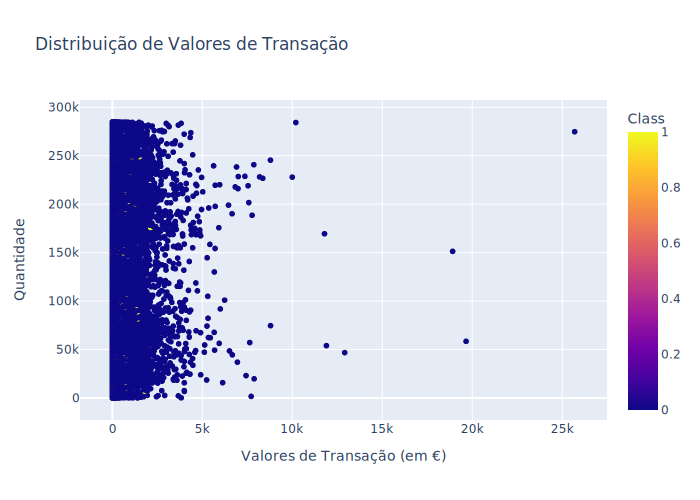

In [6]:
# Visualizando a distribuição dos valores de transação
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribuição de Valores de Transação')
fig.update_layout(xaxis_title='Valores de Transação (em €)',
                    yaxis_title='Quantidade')
fig.show()

In [7]:
# Organizando as fraudes pelo valor de transação
df.query("Class == 1").sort_values('Amount', ascending = False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00,1


Dentre as **transações fraudulentas**, o **valor mais alto** é de €2.125,87.

<AxesSubplot:ylabel='Class'>

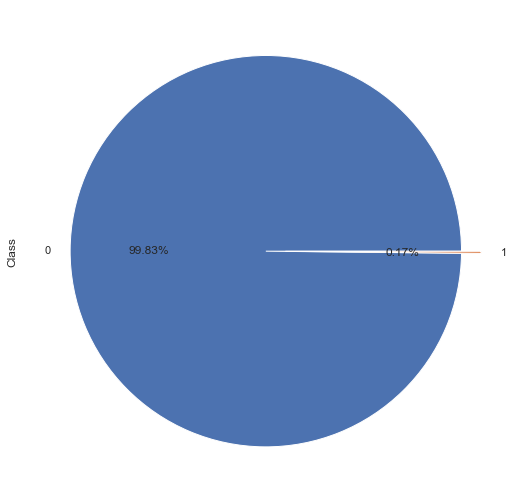

In [8]:
# Visualizando a distribuição de transações genuínas e fraudulentas
sns.set(rc={'figure.figsize':(12,9)})
df.Class.value_counts().plot(kind='pie',autopct='%.2f%%',explode=(0,0.1))

99.83% das transações foram verdadeiras. Apenas 0.17% foram fraudulentas

# Utilizando StandardScaler

Como os valores de transação registrados são muito **discrepantes** em relação às demais variáveis, iremos utilizar o método **StandardScaler** do Scikit-Learn para transformar estes valores e colocá-los em uma escala onde eles não causem impactos negativos na performance dos nossos modelos de previsão.

In [9]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df.Amount.values.reshape(-1,1)) # Normalizando valores
# Removendo 'Amount' e 'Time' do dataframe
df.drop(['Amount','Time'], inplace = True, axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


# Split 70 - 30

Vamos dividir nossos dados seguindo uma distribuição 70-30, onde 70% dos dados servirão para treinar o modelo e 30% servirão para testá-lo.

In [10]:
Y = df.Class
X = df.drop(['Class'],axis = 1)
(train_x,test_x,train_y,test_y) = train_test_split(X,Y, test_size=0.3, random_state=42)

print("Tamanho de train_x: ", train_x.shape)
print("Tamanho de test_x: ", test_x.shape)

Tamanho de train_x:  (199364, 29)
Tamanho de test_x:  (85443, 29)


# Aplicando os classificadores

In [11]:
# Preparando classificadores
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)
# Classificador Decision Tree
decision_tree.fit(train_x,train_y)
predictions_dt = decision_tree.predict(test_x)
decision_tree_score = round(decision_tree.score(test_x,test_y) * 100, 2)

# Classificador Random Forest
random_forest.fit(train_x,train_y)
prediction_rf = random_forest.predict(test_x)
random_forest_score = round(random_forest.score(test_x,test_y) * 100,2)

print('Performance Decision Tree: ', decision_tree_score)
print('Performance Random Forest: ', random_forest_score)

Performance Decision Tree:  99.93
Performance Random Forest:  99.96


# Métricas de Performance<br>
Quando lidamos com modelos de classificação, utilizamos algumas métricas de avaliação comparando as classes verdadeiras com as classes preditas pelo modelo, afim de medir o quão corretamente o modelo prevê aquilo que desejamos.<br><br>
Uma forma muito simples de visualizar a performance do modelo é a **matriz de confusão**, organizada da seguinte forma:<br><br>
<center><img src= "https://miro.medium.com/max/1400/1*j0TSVygS7ZPfK-lZkojNcQ.png"></center><br><br>
A <b>matriz de confusão</b> consegue nos mostrar as classificações corretas e incorretas de cada classe e nos indica se o modelo está favorecendo uma classe em detrimento da outra ou não.<br><br>
Além da matriz de confusão, temos as seguintes métricas de avaliação do modelo:<br><br>

##### Acurácia <br><br> 
Nos diz o quanto o modelo classificou corretamente, independente da classe dos exemplos. É definida pela seguinte fórmula:<br>
<center><img src = "https://miro.medium.com/max/1178/1*tNTpugu1beoC3f6ivswnsA.png"></center><br>
Onde: TP = Verdadeiro Positivo;<br>
TN = Verdadeiro Negativo;<br>
FP = Falso Positivo e<br>
FN = Falso Negativo. <br><br> 

##### Precisão <br><br> 
É a razão entre o número de exemplos positivos classificados corretamente e o total de exemplos classificados como positivos, incluindo os falsos positivos, e busca responder qual a proporção de classificações positivas foi realmente correta. É definida pela seguinte fórmula:<br>
<center><img src = "https://miro.medium.com/max/476/1*pJrHo_sp-pnLFl6Ww3imUw.png"></center><br><br>

##### Recall <br><br> 
Pode ser definida como a taxa de verdadeiro positivo e busca responder o quão bem o modelo prevê a classe de positivos. É definida pela seguinte fórmula:<br>
<center><img src = "https://miro.medium.com/max/396/1*zgmkLfNNRtFwCHp8m46AKA.png"></center><br><br>

##### F1 Score <br><br> 
O F1 Score é o balanço entre a **precisão** e o **recall** e é definida pela seguinte fórmula:<br>
<center><img src = "https://miro.medium.com/max/520/1*sBVtY3BJoJbOs47ZZx46tA.png"></center><br><br>

### Métricas de Performance - Decision Tree

In [12]:
# Imprinindo as métricas de performance do classificador Decision Tree
metricas_decision_tree = [['Acurácia',(accuracy_score(test_y, predictions_dt))],
                         ['Precisão',precision_score(test_y, predictions_dt)],
                         ['Recall', recall_score(test_y, predictions_dt)],
                         ['F1_score',f1_score(test_y, predictions_dt)]]
metricas_acuracia_decision_tree = pd.DataFrame(metricas_decision_tree, columns = ['Métrica', 'Resultado'])
metricas_acuracia_decision_tree

,Métrica,Resultado
0,Acurácia,0.999251
1,Precisão,0.746575
2,Recall,0.801471
3,F1_score,0.773050


[Text(0, 0.5, 'Genuínas'), Text(0, 1.5, 'Fraudes')]

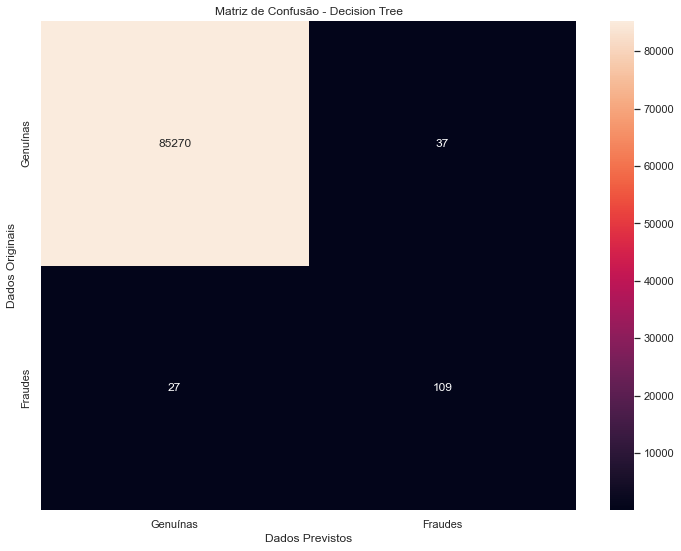

In [13]:
# Matriz de Confusão
confusion_matrix_decision_tree = confusion_matrix(test_y, predictions_dt)
# Visualização
ax = plt.subplot()
sns.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Dados Previstos')
ax.set_ylabel('Dados Originais')
ax.set_title('Matriz de Confusão - Decision Tree')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])

### Métricas de Performance - Random Forest

In [14]:
# Métricas Random Forest
metricas_random_forest = [['Acurácia',(accuracy_score(test_y, prediction_rf))],
                         ['Precisão',precision_score(test_y, prediction_rf)],
                         ['Recall', recall_score(test_y, prediction_rf)],
                         ['F1_score',f1_score(test_y, prediction_rf)]]
metricas_acuracia_random_forest = pd.DataFrame(metricas_random_forest, columns = ['Métrica', 'Resultado'])
metricas_acuracia_random_forest

,Métrica,Resultado
0,Acurácia,0.999602
1,Precisão,0.939655
2,Recall,0.801471
3,F1_score,0.865079


[Text(0, 0.5, 'Genuínas'), Text(0, 1.5, 'Fraudes')]

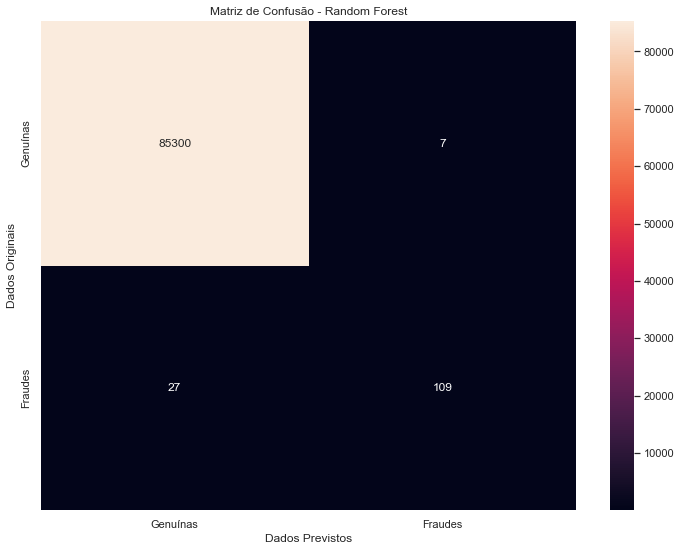

In [15]:
# Matriz de Confusão
confusion_matrix_random_forest = confusion_matrix(test_y, prediction_rf)
# Visualização
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Dados Previstos')
ax.set_ylabel('Dados Originais')
ax.set_title('Matriz de Confusão - Random Forest')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])

Observando as **métricas de performance**, percebemos o algoritmo **Random Forest** performou melhor. Entretanto, o algoritmo está **favorecendo a classe de transações genuínas em detrimento das fraudulentas** e isto ocorre, pois nossos dados estão **desbalanceados**, contendo 99.83% de transações genuínas, enquanto apenas 0.17% são exemplos de transações fraudulentas.<br><br>
Para corrigir este desbalanceamento, iremos utilizar o **SMOTE** para fazer um **oversampling** dos dados de transações fraudulentas. Isto é, iremos aplicar uma técnica de **sobreamostragem** de dados, criando novos exemplos sintéticos de transações fraudulentas, baseando-nos naquelas que estão contidas no dataset, visando eliminar o forte desequilíbrio que temos entre transações genuínas e fraudulentas.

# Oversampling com SMOTE

In [16]:
# Importamos SMOTE da biblioteca imblearn, que lida com dados desbalanceados
from imblearn.over_sampling import SMOTE
resampled_x, resampled_y = SMOTE().fit_resample(X,Y) # redimensionamos os dados

print('Novo tamanho de X: ', resampled_x.shape)
print('Novo tamanho de Y: ', resampled_y.shape)

Novo tamanho de X:  (568630, 29)
Novo tamanho de Y:  (568630,)


In [17]:
# Split 70-30 com dados redimensionados
(train_x,test_x,train_y,test_y) = train_test_split(resampled_x, resampled_y,
                                                  test_size = 0.3, random_state = 42)

# Aplicando o algoritmo Random Forest nos dados redimensionados
resampled_random_forest = RandomForestClassifier(n_estimators = 100)
resampled_random_forest.fit(train_x,train_y)

predictions_resampled = resampled_random_forest.predict(test_x)
random_forest_new_score = round(resampled_random_forest.score(test_x,test_y) * 100, 4)
print('Performance do Classificador: ', random_forest_new_score)

Performance do Classificador:  99.9853


In [18]:
# Métricas Random Forest pós-oversampling
metricas_random_forest_resampled = [['Acurácia',(accuracy_score(test_y, predictions_resampled))],
                         ['Precisão',precision_score(test_y, predictions_resampled)],
                         ['Recall', recall_score(test_y, predictions_resampled)],
                         ['F1_score',f1_score(test_y, predictions_resampled)]]
metricas_acuracia_random_forest_resampled = pd.DataFrame(metricas_random_forest_resampled, columns = ['Métrica', 'Resultado'])
metricas_acuracia_random_forest_resampled

,Métrica,Resultado
0,Acurácia,0.999853
1,Precisão,0.999766
2,Recall,0.999941
3,F1_score,0.999854


[Text(0, 0.5, 'Genuínas'), Text(0, 1.5, 'Fraudes')]

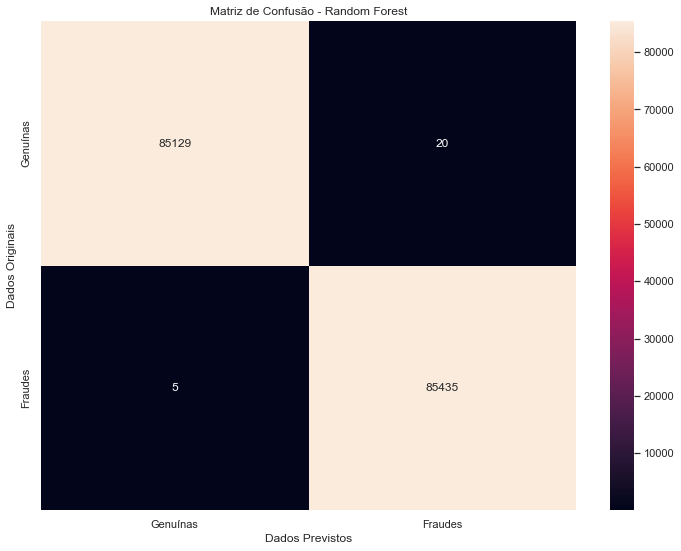

In [19]:
# Matriz de Confusão
confusion_matrix_random_forest_resampled = confusion_matrix(test_y, predictions_resampled)
# Visualização
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest_resampled, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Dados Previstos')
ax.set_ylabel('Dados Originais')
ax.set_title('Matriz de Confusão - Random Forest')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])

# Conclusão <br>
Após utilizarmos o SMOTE para aplicarmos o **oversampling** dos dados, percebemos, através da **matriz de confusão**, que o algoritmo já **não** favorece mais transações genuínas em detrimento das transações fraudulentas, obtendo, como resultado:<br><br>
- 85.132 verdadeiros positivos.<br>
- 17 falsos positivos.<br>
- 1 falso negativo.<br>
- 85.439 verdadeiros negativos.<br><br>

Obtivemos uma **acurácia** de **99.98%**, **precisão** de **99.98%**, **recall** de **99.99%** e um **F1 Score** de **99.98%**. Todas excelentes métricas, o que indica que nosso modelo aprendeu e se tornou capaz de identificar transações fraudulentas de cartão de crédito com altas taxas de acerto.